In [141]:
import pandas as pd
from geopy.geocoders import Nominatim
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn-white')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [106]:
# put your local path in here
df = pd.read_excel(r"C:\Users\ymehr\Downloads\ValidData-MitC2022data - SalesPopulation.xlsx",sheet_name='filtered')

In [107]:
df.head()

,NBHD,PID,Situs,PrpCls,PrUse,CDU,Qual,YrRD,Remd,Imp,...,Infl2,HSA_Acres,HSALandValue,TotAcres,V/I,Inst#,SaleDate,Price,SaleValidity,Sum801TLA
0,7HST242,09-13-434-003-000,2525 RIDGE RD,R1,1,4.0,6.0,NaN,NaN,R2,...,NaN,NaN,NaN,1.30,I,2016017053,2016-05-05,2122450.0,1,12026
1,7HSE361,16-11-404-012-000,5330 S 93RD PL,R1,1,4.0,6.0,NaN,NaN,RA,...,9.0,NaN,NaN,0.78,I,2022024921,2022-06-02,1950000.0,1,11047
2,7HSE361,16-11-404-013-000,5410 S 93RD PL,R1,1,4.0,5.0,NaN,NaN,RA,...,NaN,NaN,NaN,0.73,I,2021068025,2021-11-11,1875000.0,1,8816
3,7AEA310,23-31-416-001-000,11737 SEABISCUIT LN,R1,12,4.0,5.0,NaN,NaN,RA,...,NaN,2.03,1933-05-06 00:00:00,3.03,I,2022028838,2022-06-25,1850000.0,1,6935
4,7HST242,09-13-402-005-000,2421 RIDGE RD,R1,1,5.0,5.0,2022.0,6.0,RA,...,NaN,NaN,NaN,0.58,I,2022024045,2022-06-01,1800000.0,1,9936


In [108]:
geolocator = Nominatim(user_agent="geoapiExercises")
pattern = re.compile(r'\d{5,}')

In [109]:
df['Modified Address'] = df['Situs'].apply(lambda x:x + 'Lancaster County')

In [6]:
def get_zipcodes(address):
    try:
        location = geolocator.geocode(address,timeout=100000)
        zip = re.search(pattern, location.raw['display_name']).group()
        return zip
    except:
        return np.nan

temp = df['Modified Address'].apply(get_zipcodes)

In [ ]:
len(temp.dropna())

In [ ]:
df['Zip Code'] = temp

In [112]:
df.corr()['Price']

PrUse           0.195567
CDU             0.120910
Qual            0.575430
YrRD           -0.005322
Remd            0.020230
TLA             0.689752
YrBlt           0.476923
GarCap          0.597921
Bedrm           0.167392
FND             0.349925
801Units        0.728121
802Units        0.185000
803Units        0.689107
FP              0.309291
FixCt           0.727844
Pool            0.398349
Acres           0.032477
LandValue       0.798683
Infl1           0.005623
Infl2           0.131819
HSA_Acres       0.061069
TotAcres        0.263807
Inst#           0.265492
Price           1.000000
SaleValidity   -0.000904
Sum801TLA       0.786005
Name: Price, dtype: float64

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34125 entries, 0 to 34124
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NBHD              34125 non-null  object        
 1   PID               34125 non-null  object        
 2   Situs             34125 non-null  object        
 3   PrpCls            34125 non-null  object        
 4   PrUse             34125 non-null  int64         
 5   CDU               34116 non-null  float64       
 6   Qual              34116 non-null  float64       
 7   YrRD              3698 non-null   float64       
 8   Remd              3790 non-null   float64       
 9   Imp               34116 non-null  object        
 10  TLA               34123 non-null  float64       
 11  YrBlt             34116 non-null  float64       
 12  GarCap            31197 non-null  float64       
 13  Bedrm             34115 non-null  float64       
 14  FND               3411

In [151]:
useful_df = df[['Sum801TLA','LandValue','Qual','FixCt','GarCap','TLA','FND','Price']]

In [152]:
useful_df

,Sum801TLA,LandValue,Qual,FixCt,GarCap,TLA,FND,Price
0,12026,343850,6.0,25.0,4.0,7391.0,6.0,2122450.0
1,11047,187800,6.0,30.0,5.0,6590.0,6.0,1950000.0
2,8816,144000,5.0,26.0,4.0,4045.0,6.0,1875000.0
3,6935,175000,5.0,23.0,4.0,4174.0,6.0,1850000.0
4,9936,264500,5.0,25.0,4.0,6186.0,6.0,1800000.0
...,...,...,...,...,...,...,...,...
34120,2778,27000,2.0,14.0,NaN,1478.0,4.0,27500.0
34121,2794,36000,3.0,9.0,NaN,1898.0,4.0,21000.0
34122,371,14000,2.0,5.0,NaN,371.0,1.0,21000.0
34123,1540,45000,3.0,8.0,2.0,1108.0,5.0,0.0


In [153]:
useful_df.dropna(how='any',inplace=True)

<ipython-input-153-864e3b5e881f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  useful_df.dropna(how='any',inplace=True)


In [154]:
useful_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31196 entries, 0 to 34124
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sum801TLA  31196 non-null  int64  
 1   LandValue  31196 non-null  int64  
 2   Qual       31196 non-null  float64
 3   FixCt      31196 non-null  float64
 4   GarCap     31196 non-null  float64
 5   TLA        31196 non-null  float64
 6   FND        31196 non-null  float64
 7   Price      31196 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 2.1 MB


In [155]:
X = useful_df[useful_df.columns[:-1]]
Y = useful_df[useful_df.columns[-1]]
# Y = np.reshape(list(Y),(-1,1))
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [156]:
y_train.shape

(24956,)

In [157]:
model = LinearRegression().fit(x_train,y_train)
predictions = model.predict(x_test)

In [158]:
y_test = list(y_test)
ratios = [predictions[i]/y_test[i] for i in range(len(predictions))]
ratios = list(filter(lambda x:x!=float('inf'),ratios))

<ipython-input-158-2e634147cba2>:2: RuntimeWarning: divide by zero encountered in double_scalars
  ratios = [predictions[i]/y_test[i] for i in range(len(predictions))]


In [159]:
np.mean(ratios)

1.0269544984798675

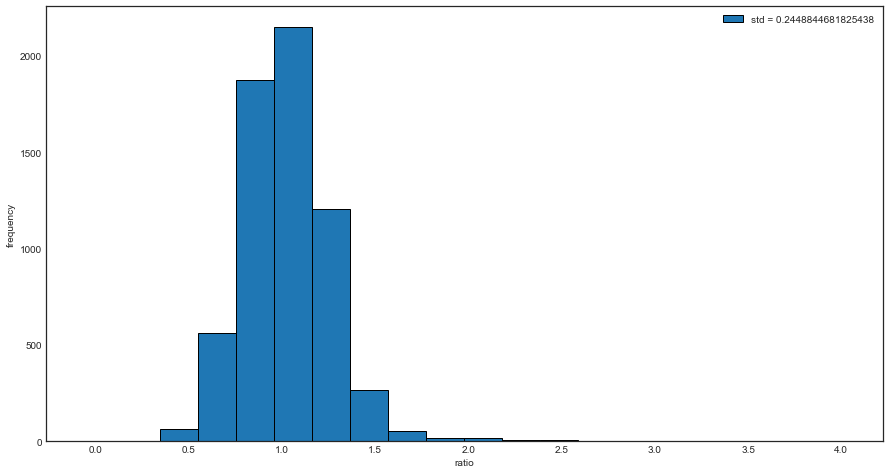

In [164]:
plt.figure(figsize=(15,8))
plt.hist(ratios,bins=20,edgecolor='black',label=f'std = {np.std(ratios)}')
plt.xlabel('ratio')
plt.ylabel('frequency')
plt.legend()
plt.savefig('distribution')
plt.show()

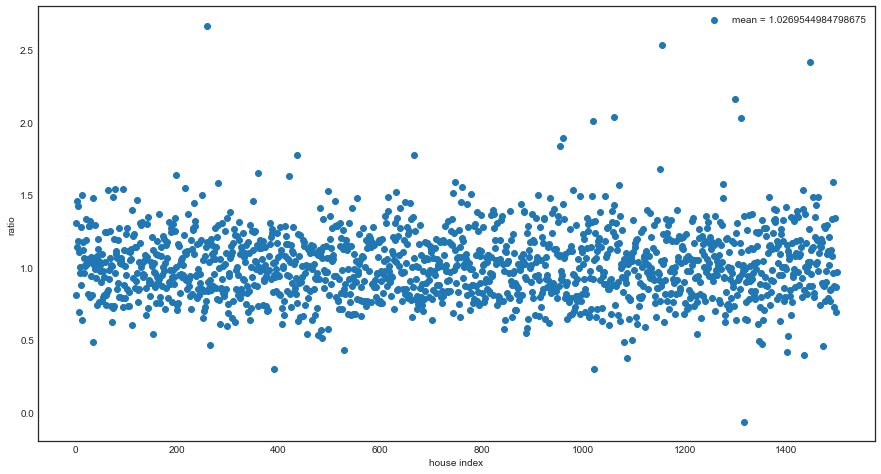

In [161]:
plt.figure(figsize=(15,8))
plt.scatter(range(len(ratios))[0:1500],ratios[:1500],label=f'mean = {np.mean(ratios)}')
plt.xlabel('house index')
plt.ylabel('ratio')
plt.legend()
plt.savefig('ratio plot')
plt.show()

In [163]:
r2_score(y_test,predictions)

0.7720115797241192